In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head(5)

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
   'total_bill' : 'valor_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia', 
    'time' : 'horario', 
    'size' : 'quantidade_pessoas'
}

In [6]:
gorjetas = dados.rename(columns = renomear)

In [7]:
gorjetas.head(1)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [10]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [11]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas
126,8.52,1.48,Não,Thur,Lunch,2
133,12.26,2.00,Não,Thur,Lunch,2
214,28.17,6.50,Sim,Sat,Dinner,3
135,8.51,1.25,Não,Thur,Lunch,2
100,11.35,2.50,Sim,Fri,Dinner,2


In [12]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [13]:
dias = {
    'Sun' : 'Domingo', 
    'Sat' : 'Sábado', 
    'Thur' : 'Quinta', 
    'Fri' : 'Sexta'
}

In [14]:
gorjetas.dia = gorjetas.dia.map(dias)

In [15]:
gorjetas.sample(6)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas
33,20.69,2.45,Não,Sábado,Dinner,4
169,10.63,2.00,Sim,Sábado,Dinner,2
239,29.03,5.92,Não,Sábado,Dinner,3
182,45.35,3.50,Sim,Domingo,Dinner,3
77,27.20,4.00,Não,Quinta,Lunch,4
81,16.66,3.40,Não,Quinta,Lunch,2


In [16]:
gorjetas.horario.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
periodo = {
    'Dinner' : 'Jantar', 
    'Lunch' : 'Almoço'
}

In [18]:
gorjetas.horario = gorjetas.horario.map(periodo)

In [19]:
gorjetas.sample(6)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas
217,11.59,1.50,Sim,Sábado,Jantar,2
53,9.94,1.56,Não,Domingo,Jantar,2
25,17.81,2.34,Não,Sábado,Jantar,4
179,34.63,3.55,Sim,Domingo,Jantar,2
79,17.29,2.71,Não,Quinta,Almoço,2
56,38.01,3.00,Sim,Sábado,Jantar,4


# Gráficos

In [20]:
!pip install seaborn==0.9.0

  Using cached seaborn-0.9.0-py3-none-any.whl (208 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Acesso negado: 'c:\\programdata\\anaconda3\\lib\\site-packages\\seaborn-0.11.0.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



In [21]:
import seaborn as sns

In [22]:
!pip show seaborn

Name: seaborn
Version: 0.11.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\programdata\anaconda3\lib\site-packages
Requires: pandas, numpy, matplotlib, scipy
Required-by: 


In [23]:
gorjetas.sample(6)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas
2,21.01,3.50,Não,Domingo,Jantar,3
107,25.21,4.29,Sim,Sábado,Jantar,2
68,20.23,2.01,Não,Sábado,Jantar,2
61,13.81,2.00,Sim,Sábado,Jantar,2
83,32.68,5.00,Sim,Quinta,Almoço,2
85,34.83,5.17,Não,Quinta,Almoço,4


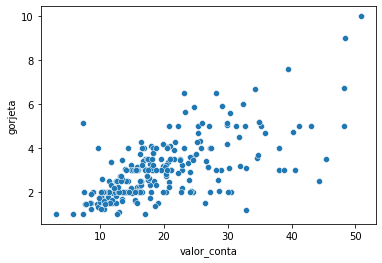

In [24]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data = gorjetas)

In [25]:
print('A base de dados contém {} registros'.format(gorjetas.shape[0]))
print ('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros
Registros não nulos


valor_conta           244
gorjeta               244
sobremesa             244
dia                   244
horario               244
quantidade_pessoas    244
dtype: int64

In [26]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_conta']

In [27]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

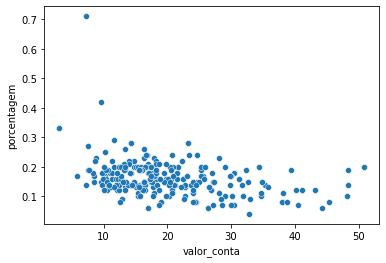

In [28]:
porcentagem_conta = sns.scatterplot(x = 'valor_conta', y = 'porcentagem', data = gorjetas)

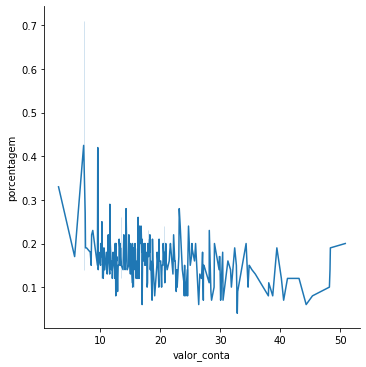

In [29]:
 porcentagem_linha = sns.relplot(x = 'valor_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

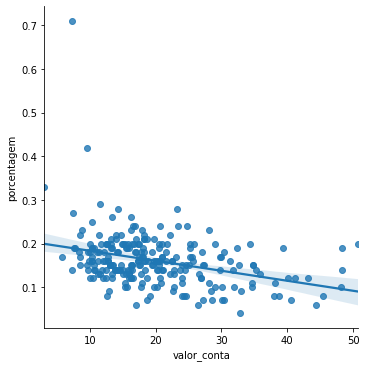

In [30]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', data = gorjetas)

In [31]:
gorjetas.sample(5)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas,porcentagem
239,29.03,5.92,Não,Sábado,Jantar,3,0.20
150,14.07,2.50,Não,Domingo,Jantar,2,0.18
185,20.69,5.00,Não,Domingo,Jantar,5,0.24
200,18.71,4.00,Sim,Quinta,Almoço,3,0.21
122,14.26,2.50,Não,Quinta,Almoço,2,0.18


In [32]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_conta,gorjeta,quantidade_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [33]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_conta,gorjeta,quantidade_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


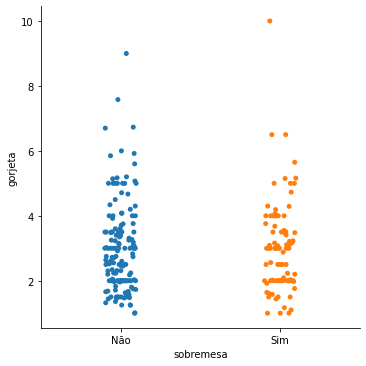

In [34]:
sns.catplot(x = 'sobremesa', y = 'gorjeta', data = gorjetas)

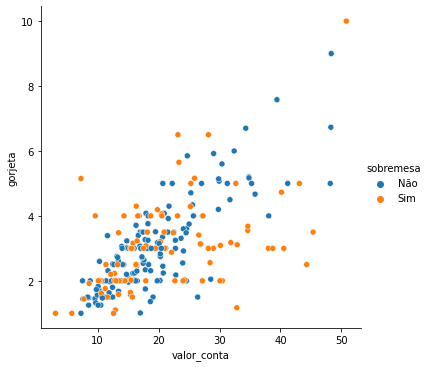

In [35]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

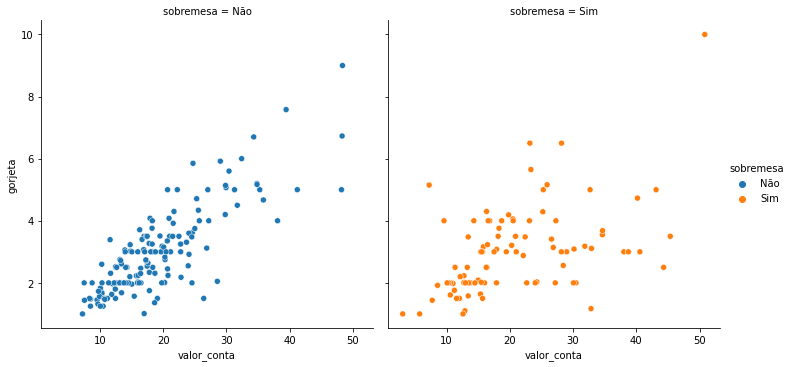

In [36]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

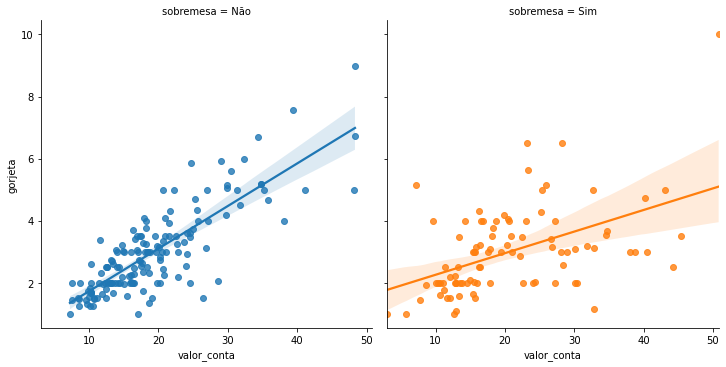

In [37]:
sns.lmplot(x = 'valor_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

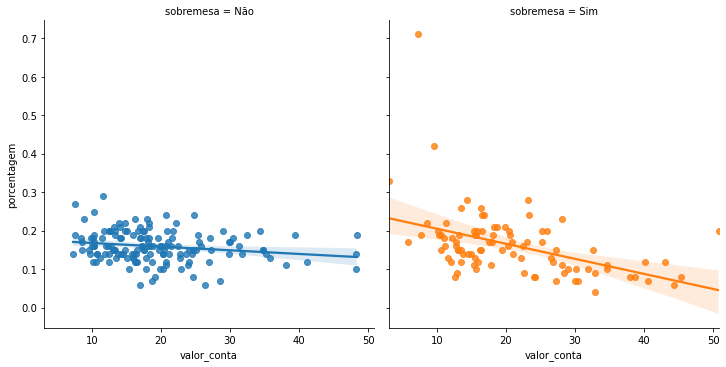

In [38]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

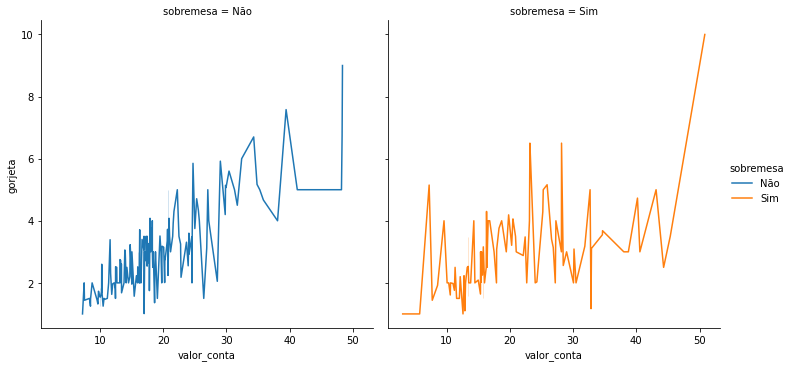

In [39]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', kind = 'line', data = gorjetas)

In [40]:
from scipy.stats import ranksums

In [41]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [42]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [43]:
r = ranksums(sobremesa, sem_sobremesa)

In [44]:
print('O valor de p-value é {}'.format(r.pvalue))

O valor de p-value é 0.5266635660124415


In [45]:
gorjetas.head(10)

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
5,25.29,4.71,Não,Domingo,Jantar,4,0.19
6,8.77,2.00,Não,Domingo,Jantar,2,0.23
7,26.88,3.12,Não,Domingo,Jantar,4,0.12
8,15.04,1.96,Não,Domingo,Jantar,2,0.13
9,14.78,3.23,Não,Domingo,Jantar,2,0.22


In [46]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

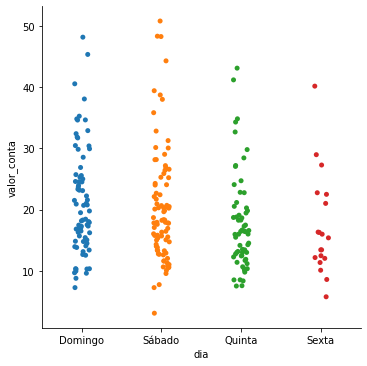

In [47]:
sns.catplot(x = 'dia', y = 'valor_conta', data = gorjetas)

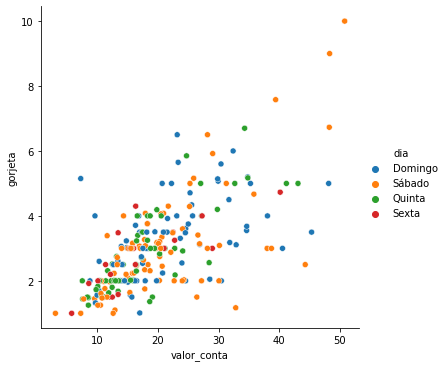

In [48]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', data = gorjetas)

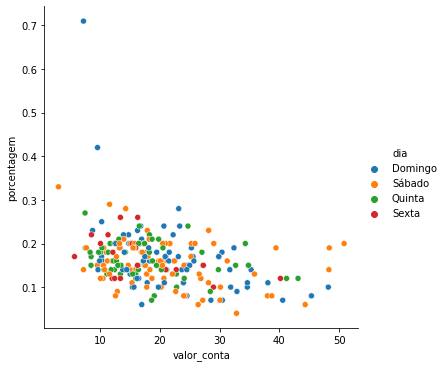

In [49]:
sns.relplot(x = 'valor_conta', y = 'porcentagem', hue = 'dia', data = gorjetas)

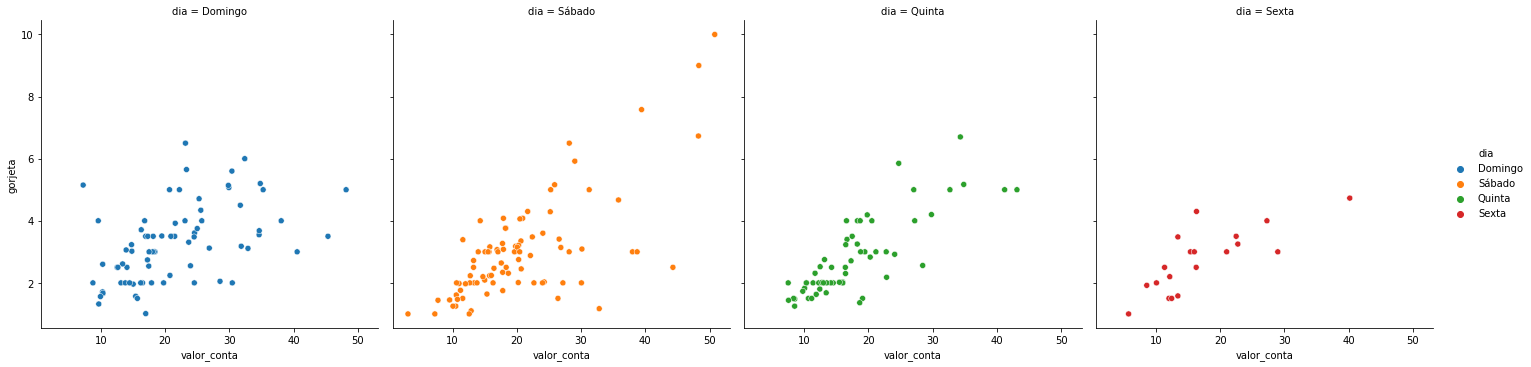

In [51]:
sns.relplot(x = 'valor_conta', y = 'gorjeta', hue = 'dia', col = 'dia', data = gorjetas)

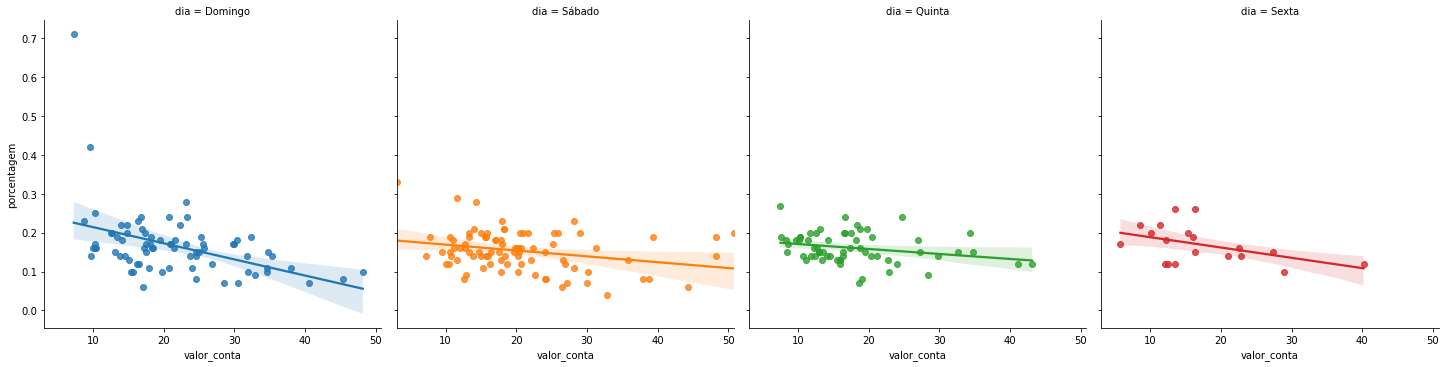

In [52]:
sns.lmplot(x = 'valor_conta', y = 'porcentagem', hue = 'dia', col = 'dia', data = gorjetas)

In [54]:
gorjetas.gorjeta.mean()

2.9982786885245902

In [55]:
gorjetas.groupby(['dia']).mean()

,valor_conta,gorjeta,quantidade_pessoas,porcentagem
dia,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [56]:
gorjetas.dia.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

In [57]:
valor_domingo = gorjetas.query("dia == 'Domingo'").valor_conta

In [58]:
valor_sabado = gorjetas.query("dia == 'Sábado'").valor_conta

In [61]:
ranksums(valor_domingo, valor_sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

In [62]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia,horario,quantidade_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [63]:
gorjetas.horario.unique()

array(['Jantar', 'Almoço'], dtype=object)

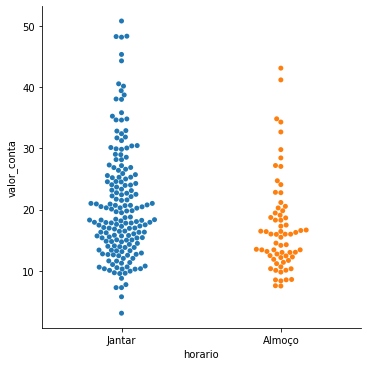

In [65]:
sns.catplot(x = 'horario', y = 'valor_conta', kind = 'swarm', data = gorjetas)

<AxesSubplot:xlabel='horario', ylabel='valor_conta'>

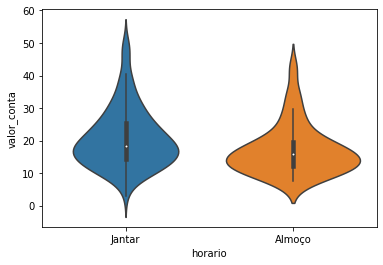

In [66]:
sns.violinplot(x = 'horario', y = 'valor_conta', data = gorjetas)

<AxesSubplot:xlabel='horario', ylabel='valor_conta'>

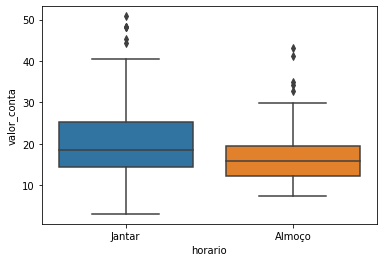

In [67]:
sns.boxplot(x = 'horario', y = 'valor_conta', data = gorjetas)

In [69]:
almoco = gorjetas.query("horario == 'Almoço'").valor_conta

In [70]:
jantar = gorjetas.query("horario == 'Jantar'").valor_conta

<AxesSubplot:xlabel='valor_conta', ylabel='Density'>

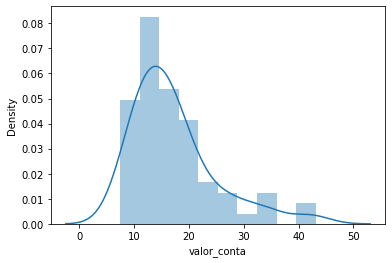

In [73]:
sns.distplot(almoco)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_conta', ylabel='Density'>

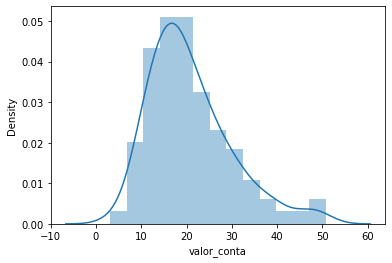

In [74]:
sns.distplot(jantar)

In [75]:
gorjetas.groupby(['horario']).mean()

,valor_conta,gorjeta,quantidade_pessoas,porcentagem
horario,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [76]:
ranksums(jantar, almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

In [81]:
porcentagem_almoco = gorjetas.query("horario == 'Almoço'").porcentagem

In [80]:
porcentagem_jantar = gorjetas.query("horario == 'Jantar'").porcentagem

In [82]:
ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)